In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)


# Machine Learning 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import f1_score, roc_auc_score, precision_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.impute import SimpleImputer, KNNImputer
!pip install optuna
import optuna
METRIC = f1_score
metric = 'f1_macro'

# METRIC = f1_score
# metric = 'f1'


# Classifiers
!pip install lightgbm
from lightgbm import LGBMClassifier
!pip install catboost
from catboost import CatBoostClassifier
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [3]:
df = pd.read_csv("C:/Users/Acer/Downloads/data01.csv")
df

group      ID  outcome  age  gendera        BMI  hypertensive  \
0         1  125047      0.0   72        1  37.588179             0   
1         1  139812      0.0   75        2        NaN             0   
2         1  109787      0.0   83        2  26.572634             0   
3         1  130587      0.0   43        2  83.264629             0   
4         1  138290      0.0   75        2  31.824842             1   
...     ...     ...      ...  ...      ...        ...           ...   
1172      2  171130      0.0   62        1  25.516870             1   
1173      2  101659      0.0   78        1  25.822710             0   
1174      2  162069      0.0   85        2  23.891779             1   
1175      2  120967      0.0   79        2  35.288554             0   
1176      2  107636      0.0   47        1  23.121384             1   

      atrialfibrillation  CHD with no MI  diabetes  deficiencyanemias  \
0                      0               0         1                  1   
1                      0               0         0                  1   
2                      0               0         0                  1   
3                      0               0         0                  0   
4                      0               0         0                  1   
...                  ...             ...       ...                ...   
1172                   1               0         1                  0   
1173                   1               0         1                  0   
1174                   1               0         1                  1   
1175                   0               1         1                  1   
1176                   0               0         1                  0   

      depression  Hyperlipemia  Renal failure  COPD  heart rate  \
0              0             1              1     0   68.837838   
1              0             0              0     1  101.370370   
2              0             0              1     0   72.318182   
3              0             0              0     0   94.500000   
4              0             0              1     1   67.920000   
...          ...           ...            ...   ...         ...   
1172           1             1              1     0  100.125000   
1173           1             1              1     0  114.640000   
1174           0             0              1     0   52.720000   
1175           1             1              1     0   93.400000   
1176           0             0              1     0   67.289855   

      Systolic blood pressure  Diastolic blood pressure  Respiratory rate  \
0                  155.866667                 68.333333         16.621622   
1                  140.000000                 65.000000         20.851852   
2                  135.333333                 61.375000         23.640000   
3                  126.400000                 73.200000         21.857143   
4                  156.560000                 58.120000         21.360000   
...                       ...                       ...               ...   
1172               142.545455                 69.681818         24.500000   
1173               101.222222                 51.888889         18.958333   
1174               137.791667                 40.958333         18.680000   
1175                94.416667                 62.458333         22.040000   
1176               131.523077                 72.276923         23.464789   

      temperature      SP O2  Urine output  hematocrit       RBC        MCH  \
0       36.714286  98.394737        2155.0   26.272727  2.960000  28.250000   
1       36.682540  96.923077        1425.0   30.780000  3.138000  31.060000   
2       36.453704  95.291667        2425.0   27.700000  2.620000  34.320000   
3       36.287037  93.846154        8760.0   36.637500  4.277500  26.062500   
4       36.761905  99.280000        4455.0   29.933333  3.286667  30.666667   
...           ...        ...           ...         ...       ...        

In [5]:
df.shape

(1177, 51)

In [7]:
df.describe().style.background_gradient(cmap = 'PuBu')

In [9]:
df.isnull().sum()

group                         0
ID                            0
outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophil

In [11]:
# Removing Duplicates
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(1177, 51)

In [15]:
# missing = ['outcome', 'BMI', 'heart rate',
#        'Systolic blood pressure', 'Diastolic blood pressure',
#        'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
#        'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
#        'Creatine kinase','glucose', 'Blood calcium',
#        'PH', 'Lactic acid', 'PCO2']
# df.isnull().sum()
missing_values = df.isna().sum().to_dict()

In [17]:
keys = ['outcome', 'BMI', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'Creatine kinase','glucose', 'Blood calcium',
       'PH', 'Lactic acid', 'PCO2']
missing = {x:missing_values[x] for x in keys}

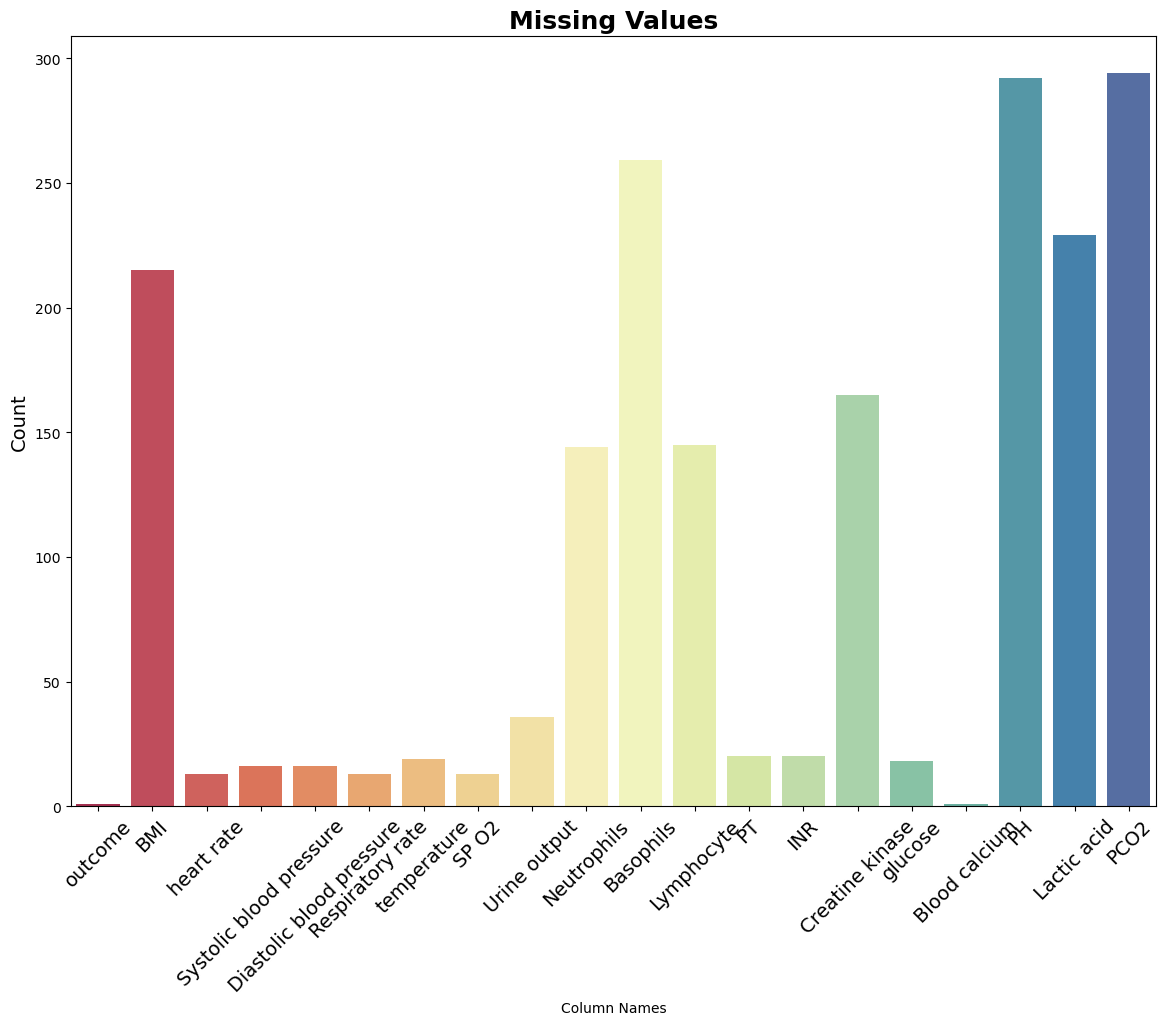

In [19]:
missing_values_df = pd.DataFrame(list(missing.items()), columns=['Column Names', 'Missing_Values'])
# fig = px.bar(missing_values_df, x = 'Column Names', y = 'Missing_Values', title = 'Missing Values')
# fig.show()
plt.figure(figsize = (14, 10))
sns.barplot(x = "Column Names", y = "Missing_Values", data = missing_values_df, palette = "Spectral")
plt.title("Missing Values", fontsize = 18, weight = "bold")
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize = 14)
plt.show()

In [21]:
y = df[['outcome']]
X = df.drop(columns = ['outcome'])

In [23]:
# imputerX = SimpleImputer(missing_values=np.nan, strategy='mean')
imputerX = KNNImputer(missing_values=np.nan, n_neighbors = 5)
cols = X.select_dtypes(include='float64').columns
cols

Index(['BMI', 'heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2',
       'Urine output', 'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW',
       'Leucocyte', 'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte',
       'PT', 'INR', 'NT-proBNP', 'Creatine kinase', 'Creatinine',
       'Urea nitrogen', 'glucose', 'Blood potassium', 'Blood sodium',
       'Blood calcium', 'Chloride', 'Anion gap', 'Magnesium ion', 'PH',
       'Bicarbonate', 'Lactic acid', 'PCO2'],
      dtype='object')

In [25]:
imputerX.fit(X[cols])

KNNImputer()

In [27]:
X[cols] = imputerX.transform(X[cols])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   age                       1177 non-null   int64  
 3   gendera                   1177 non-null   int64  
 4   BMI                       1177 non-null   float64
 5   hypertensive              1177 non-null   int64  
 6   atrialfibrillation        1177 non-null   int64  
 7   CHD with no MI            1177 non-null   int64  
 8   diabetes                  1177 non-null   int64  
 9   deficiencyanemias         1177 non-null   int64  
 10  depression                1177 non-null   int64  
 11  Hyperlipemia              1177 non-null   int64  
 12  Renal failure             1177 non-null   int64  
 13  COPD                      1177 non-null   int64  
 14  heart ra

In [29]:
# Imputing y with most frequent value
imputer_y = SimpleImputer(strategy = "most_frequent")
imputer_y.fit(y)
y = imputer_y.transform(y)
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [31]:
y = pd.DataFrame(y, columns=['outcome'], dtype='int64')
y

outcome
0           0
1           0
2           0
3           0
4           0
...       ...
1172        0
1173        0
1174        0
1175        0
1176        0

[1177 rows x 1 columns]

In [33]:
df_final = X.copy()
df_final['outcome'] = y
df_final.head()

group      ID  age  gendera        BMI  hypertensive  atrialfibrillation  \
0      1  125047   72        1  37.588179             0                   0   
1      1  139812   75        2  30.324638             0                   0   
2      1  109787   83        2  26.572634             0                   0   
3      1  130587   43        2  83.264629             0                   0   
4      1  138290   75        2  31.824842             1                   0   

   CHD with no MI  diabetes  deficiencyanemias  depression  Hyperlipemia  \
0               0         1                  1           0             1   
1               0         0                  1           0             0   
2               0         0                  1           0             0   
3               0         0                  0           0             0   
4               0         0                  1           0             0   

   Renal failure  COPD  heart rate  Systolic blood pressure  \
0              1     0   68.837838               155.866667   
1              0     1  101.370370               140.000000   
2              1     0   72.318182               135.333333   
3              0     0   94.500000               126.400000   
4              1     1   67.920000               156.560000   

   Diastolic blood pressure  Respiratory rate  temperature      SP O2  \
0                 68.333333         16.621622    36.714286  98.394737   
1                 65.000000         20.851852    36.682540  96.923077   
2                 61.375000         23.640000    36.453704  95.291667   
3                 73.200000         21.857143    36.287037  93.846154   
4                 58.120000         21.360000    36.761905  99.280000   

   Urine output  hematocrit       RBC        MCH       MCHC      MCV  \
0        2155.0   26.272727  2.960000  28.250000  31.520000   89.900   
1        1425.0   30.780000  3.138000  31.060000  31.660000   98.200   
2        2425.0   27.700000  2.620000  34.320000  31.300000  109.800   
3        8760.0   36.637500  4.277500  26.062500  30.412500   85.625   
4        4455.0   29.933333  3.286667  30.666667  33.666667   91.000   

         RDW  Leucocyte  Platelets  Neutrophils  Basophils  Lymphocyte  \
0  16.220000   7.650000    305.100       74.650       0.40   13.300000   
1  14.260000  12.740000    246.400       80.800       0.35   11.866667   
2  23.820000   5.480000    204.200       68.100       0.55   24.500000   
3  17.037500   8.225000    216.375       81.800       0.15   14.500000   
4  16.266667   8.833333    251.000       84.342       0.20    9.490000   

          PT       INR  NT-proBNP  Creatine kinase  Creatinine  Urea nitrogen  \
0  10.600000  1.000000     1956.0       148.000000    1.958333      50.000000   
1  13.925238  1.228571     2384.0        60.600000    1.122222      20.333333   
2  11.275000  0.950000     4081.0        16.000000    1.871429      33.857143   
3  27.066667  2.666667      668.0        85.000000    0.585714      15.285714   
4  16.299026  1.496818    30802.0       111.666667    1.950000      43.000000   

      glucose  Blood potassium  Blood sodium  Blood calcium    Chloride  \
0  114.636364         4.816667    138.750000       7.463636  109.166667   
1  147.500000         4.450000    138.888889       8.162500   98.444444   
2  149.000000         5.825000    140.714286       8.266667  105.857143   
3  128.250000         4.386667    138.500000       9.476923   92.071429   
4  145.750000         4.783333    136.666667       8.733333  104.500000   

   Anion gap  Magnesium ion     PH  Bicarbonate  Lactic acid  PCO2  EF  \
0  13.166667       2.618182  7.230    21.166667          0.5  40.0  55   
1  11.444444       1.887500  7.225    33.444444          0.5  78.0  55   
2  10.000000       2.157143  7.268    30.571429          0.5  71.5  35   
3  12.357143       1.942857  7.370    38.571429          0.6  75.0  55   
4  15.166667       1.650000  7.250    22.000000          0.6  50.0 

In [35]:
df_final.shape

(1177, 51)

In [37]:
# Changing gendera to gender
df_final.rename(columns = {
    'gendera':'gender',
    'Hyperlipemia':'hyperlipidemia'
}, 
          inplace = True)


In [39]:
df_final.columns

Index(['group', 'ID', 'age', 'gender', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'hyperlipidemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF', 'outcome'],
      dtype='object')

# EDA

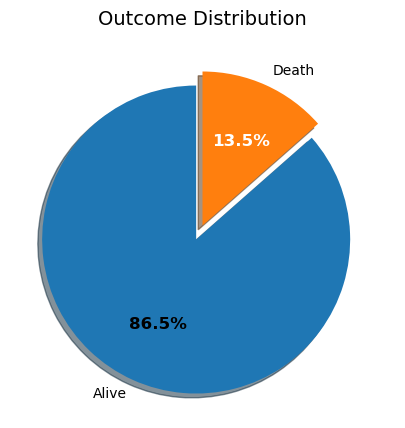

In [42]:
fig, ax = plt.subplots(figsize=(8,5), dpi=100)

patches, texts, autotexts = ax.pie(df_final['outcome'].value_counts(), autopct= '%1.1f%%', shadow=True, 
                                   startangle=90, explode=(0.1, 0), labels=['Alive','Death'])

plt.setp(autotexts, size=12, color = 'black', weight='bold')
autotexts[1].set_color('white');

plt.title('Outcome Distribution', fontsize=14)
plt.show()

<Axes: xlabel='diabetes', ylabel='Count'>

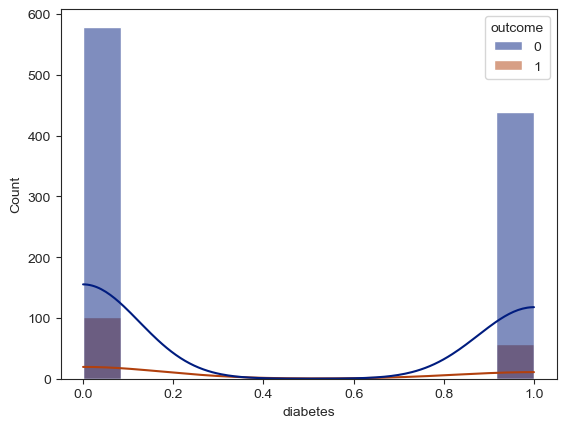

In [44]:
sns.set_style("ticks")
sns.histplot(data = df_final, x = "diabetes", kde = True, hue = "outcome", palette = "dark")

In [46]:
predictors = list(df_final.columns)
predictors.remove("outcome")
target = df_final['outcome']

In [48]:
predictors.remove("group")
predictors.remove("ID")

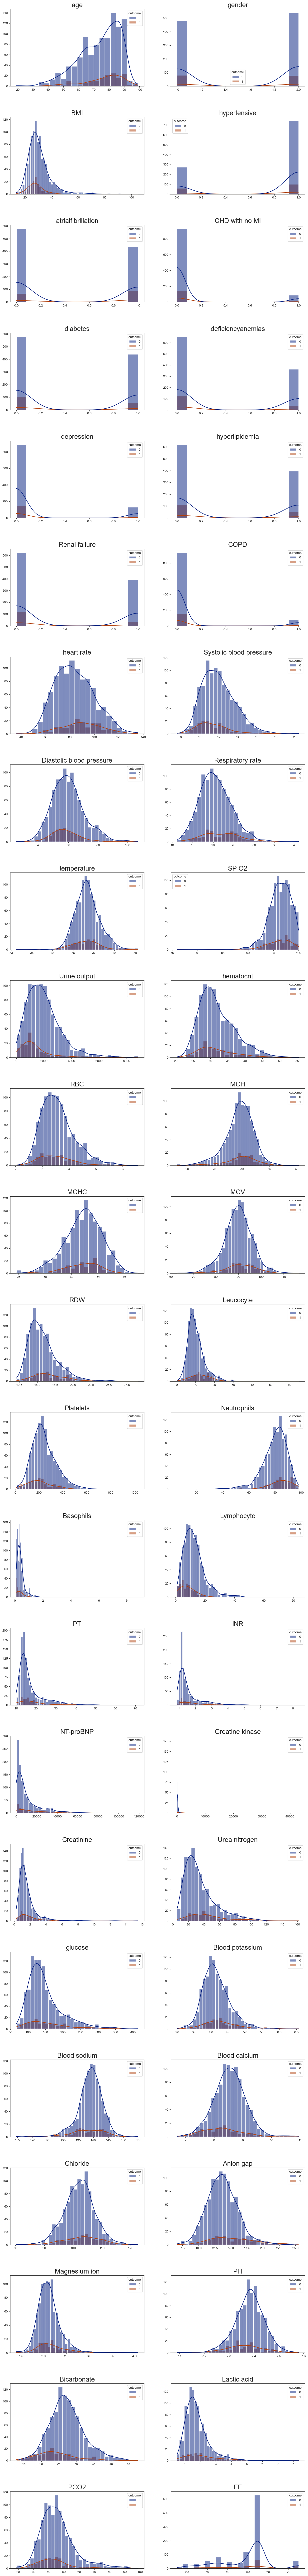

In [50]:
fig, axes = plt.subplots(nrows=24, ncols=2, figsize=(16,140))
axes = axes.flatten()

for idx, axis in enumerate(axes):
    sns.histplot(data=df_final, x=df_final[predictors].iloc[:, idx],
                 ax=axis, hue=target, legend=True, kde = True, palette = "dark") #["#682F2F","#F3AB60"], viridis, dark
    axis.set_ylabel('')
    axis.set_xlabel('')
    axis.set_title(predictors[idx], fontsize = 20)

plt.subplots_adjust(hspace = 0.4)
plt.show()

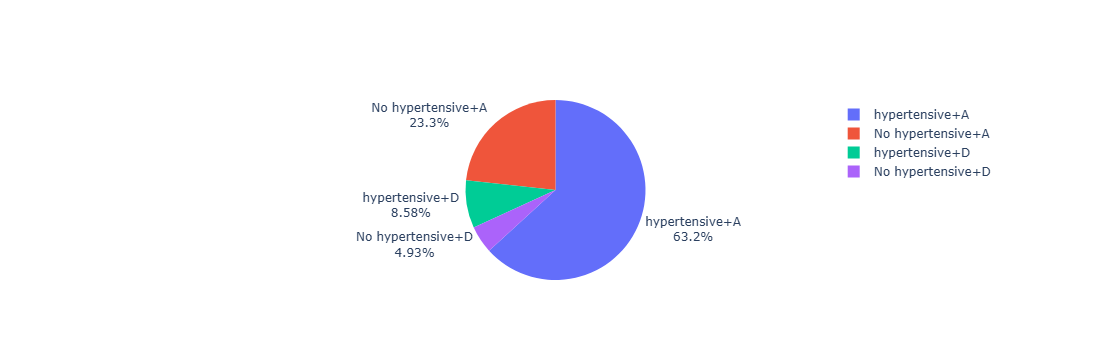

In [52]:
labels = ['No hypertensive+A', 'No hypertensive+D', 'hypertensive+A', 'hypertensive+D']
fig = go.Figure(data=[go.Pie(labels=labels, values=df_final.groupby(by=['hypertensive', 'outcome']).outcome.count(), 
                             textinfo='label+percent',
                             insidetextorientation='radial', 
                            )])
fig.show()

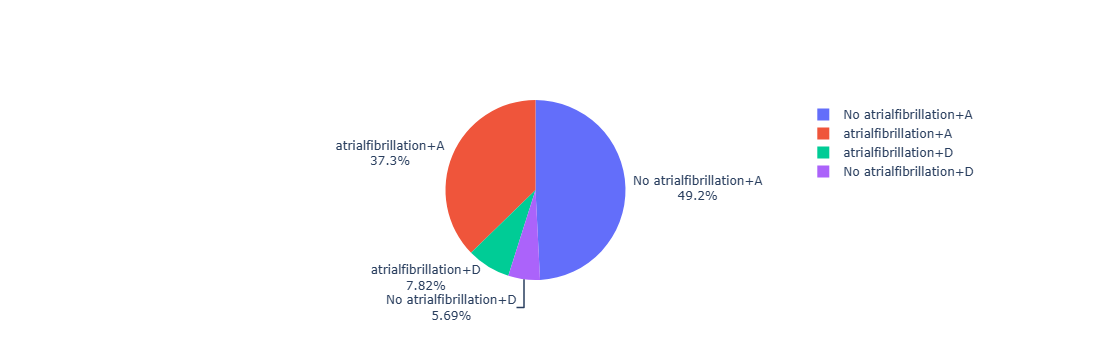

In [54]:
labels = ['No atrialfibrillation+A', 'No atrialfibrillation+D', 'atrialfibrillation+A', 'atrialfibrillation+D']
fig = go.Figure(data=[go.Pie(labels=labels, values=df_final.groupby(by=['atrialfibrillation', 'outcome']).outcome.count(), 
                             textinfo='label+percent',
                             insidetextorientation='radial', 
                            )])
fig.show()

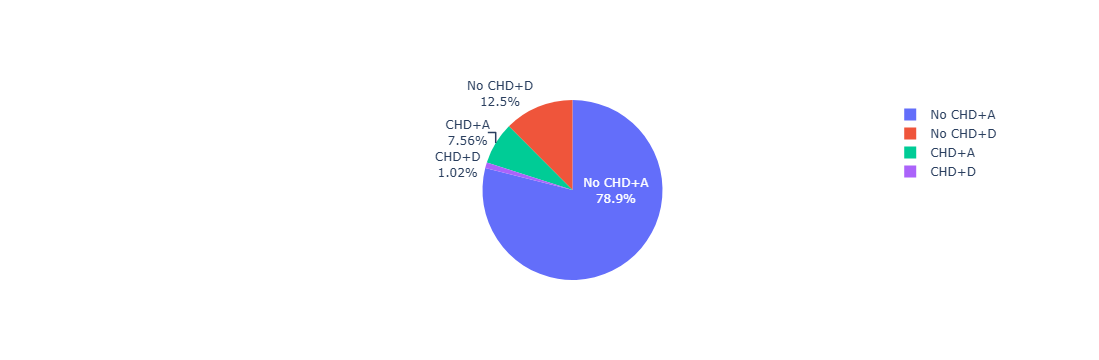

In [56]:
labels = ['No CHD+A', 'No CHD+D', 'CHD+A', 'CHD+D']
fig = go.Figure(data=[go.Pie(labels=labels, values=df_final.groupby(by=['CHD with no MI', 'outcome']).outcome.count(), 
                             textinfo='label+percent',
                             insidetextorientation='radial', 
                            )])
fig.show()

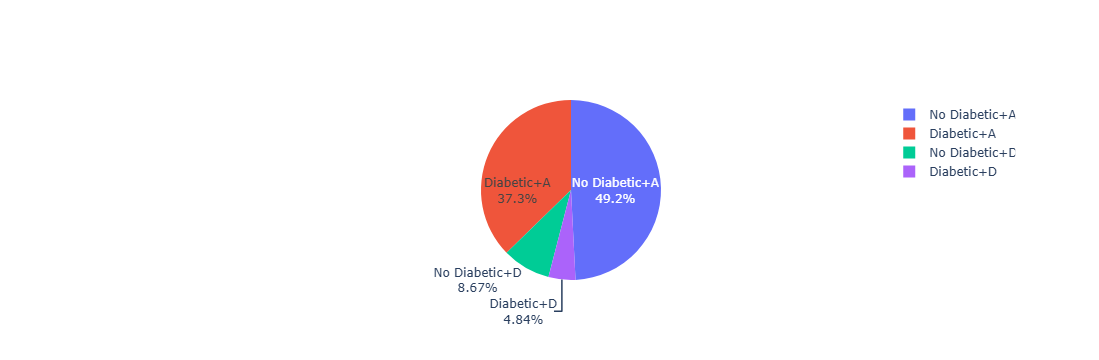

In [58]:
labels = ['No Diabetic+A', 'No Diabetic+D', 'Diabetic+A', 'Diabetic+D']
fig = go.Figure(data=[go.Pie(labels=labels, values=df_final.groupby(by=['diabetes', 'outcome']).outcome.count(), 
                             textinfo='label+percent',
                             insidetextorientation='radial', 
                            )])
fig.show()

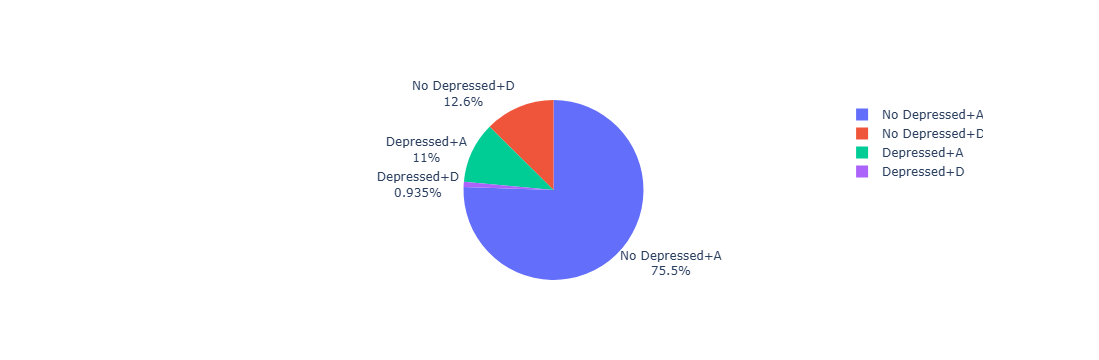

In [60]:
labels = ['No Depressed+A', 'No Depressed+D', 'Depressed+A', 'Depressed+D']
fig = go.Figure(data=[go.Pie(labels=labels, values=df_final.groupby(by=['depression', 'outcome']).outcome.count(), 
                             textinfo='label+percent',
                             insidetextorientation='radial', 
                            )])
fig.show()


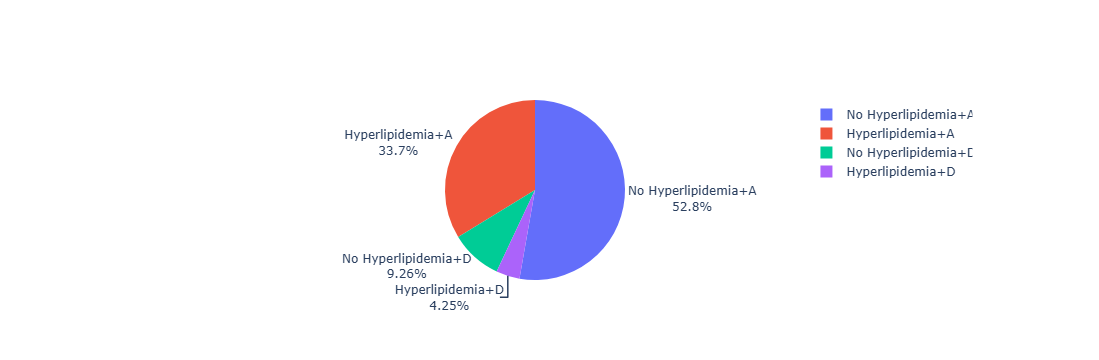

In [62]:
labels = ['No Hyperlipidemia+A', 'No Hyperlipidemia+D', 'Hyperlipidemia+A', 'Hyperlipidemia+D']
fig = go.Figure(data=[go.Pie(labels=labels, values=df_final.groupby(by=['hyperlipidemia', 'outcome']).outcome.count(), 
                             textinfo='label+percent',
                             insidetextorientation='radial', 
                            )])
fig.show()


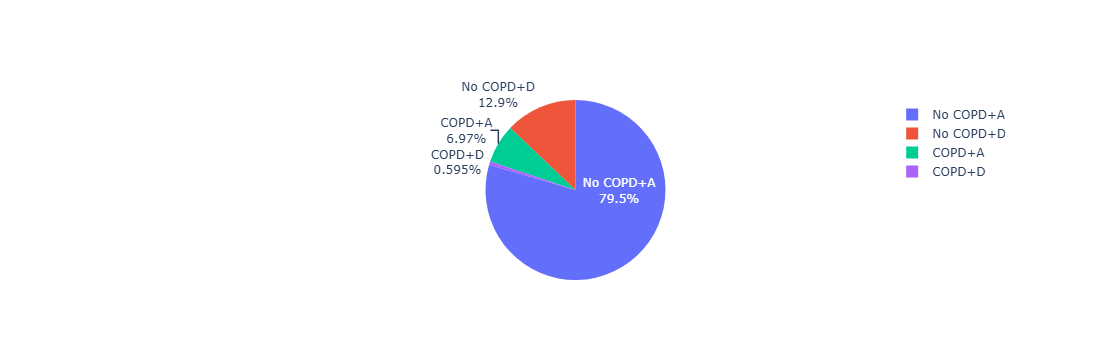

In [64]:
labels = ['No COPD+A', 'No COPD+D', 'COPD+A', 'COPD+D']
fig = go.Figure(data=[go.Pie(labels=labels, values=df_final.groupby(by=['COPD', 'outcome']).outcome.count(), 
                             textinfo='label+percent',
                             insidetextorientation='radial', 
                            )])
fig.show()

# Correlation

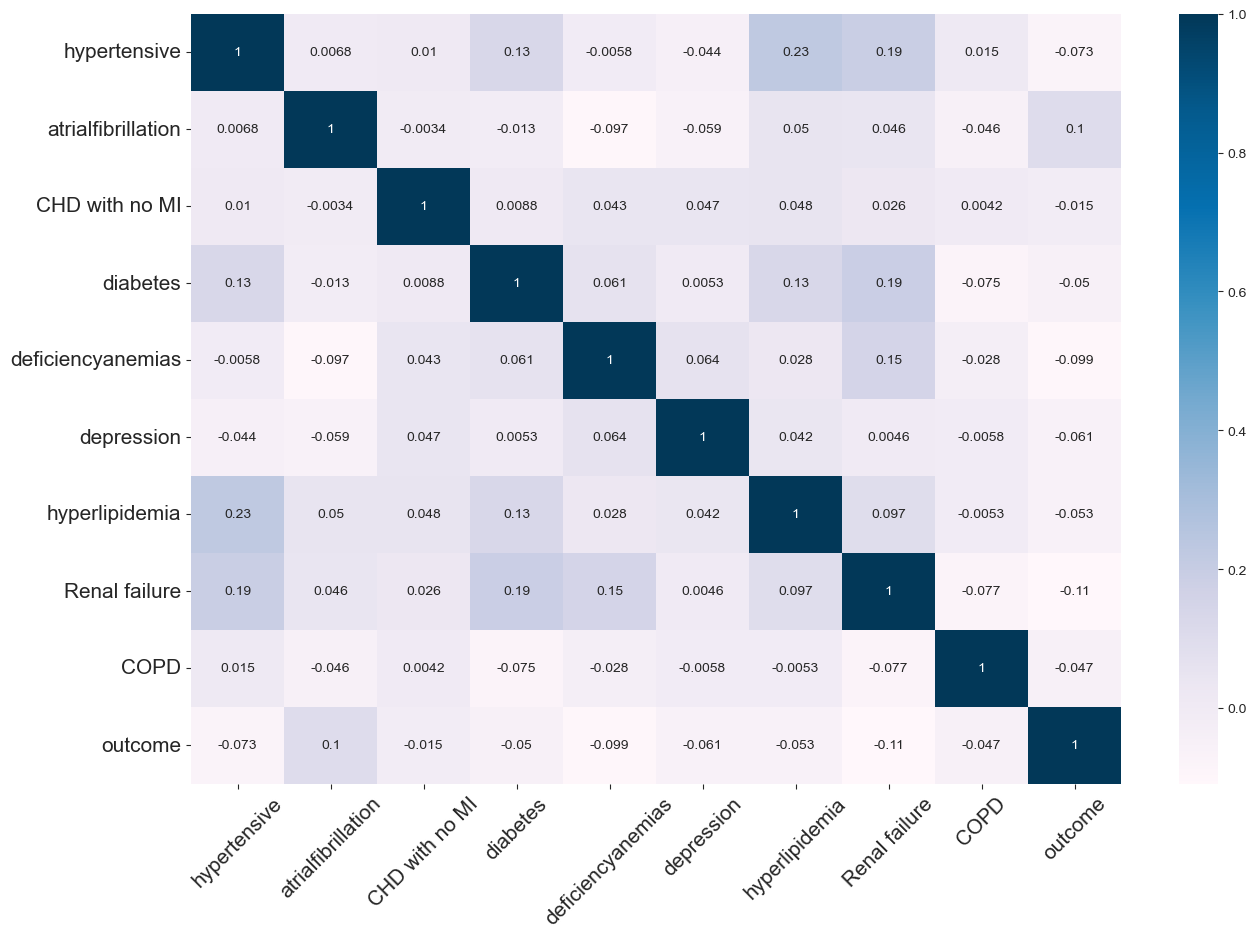

In [67]:
corr_cols = ['hypertensive', 'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
             'depression', 'hyperlipidemia', 'Renal failure', 'COPD', 'outcome']

cor = df_final[corr_cols].corr()

plt.figure(figsize=(15,10))
sns.heatmap(cor, annot = True, cmap = "PuBu")
plt.xticks(fontsize = 15, rotation = 45)
plt.yticks(fontsize = 15)
plt.show()

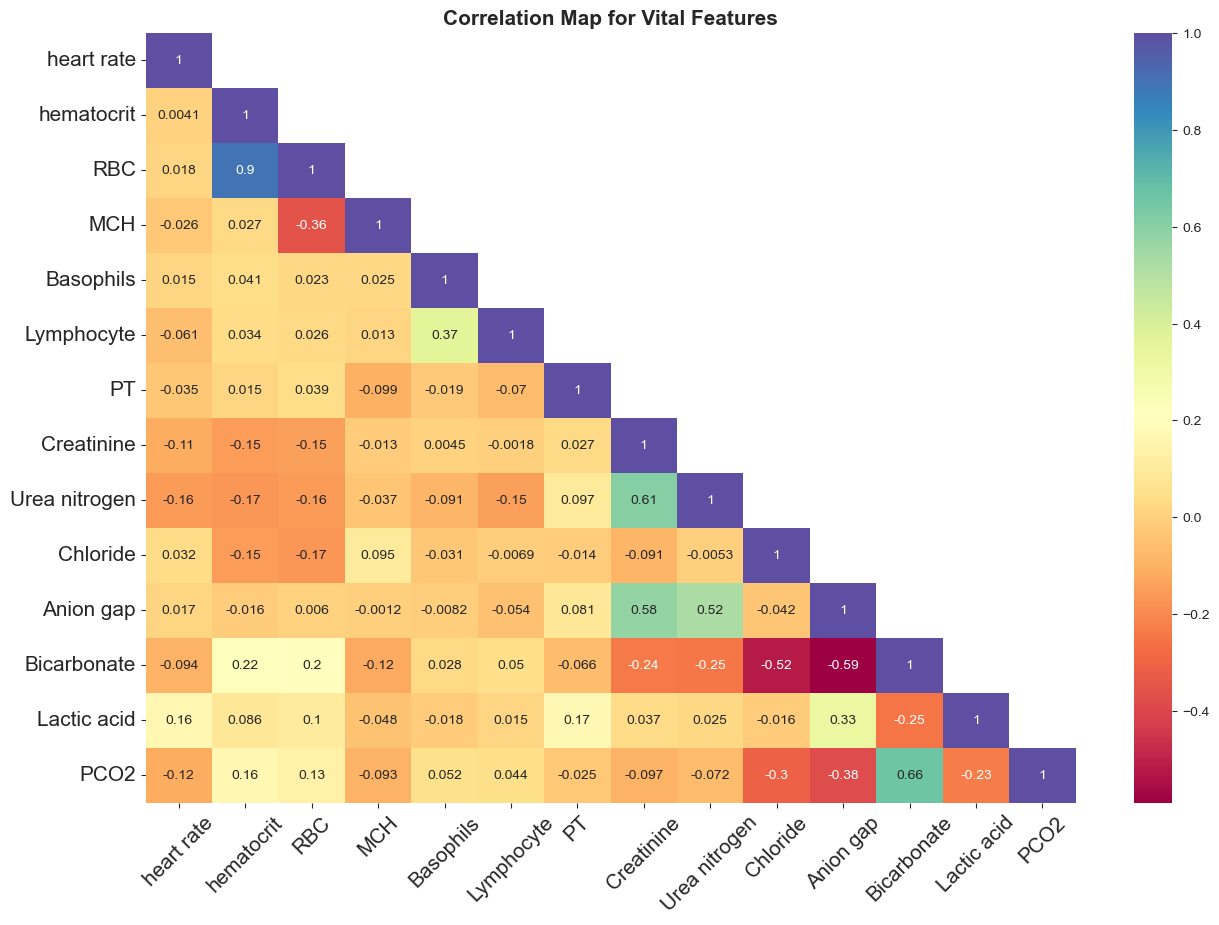

In [69]:
continous_corr = ['heart rate','hematocrit', 'RBC', 'MCH',
        'Basophils', 'Lymphocyte', 'PT', 'Creatinine', 'Urea nitrogen',
       'Chloride', 'Anion gap', 'Bicarbonate',
       'Lactic acid', 'PCO2'] # BMI, Urine Output

corr2 = df_final[continous_corr].corr()
df_lt = corr2.where(np.tril(np.ones(corr2.shape)).astype(bool))
plt.figure(figsize=(15,10))
hmap=sns.heatmap(df_lt,cmap="Spectral", annot = True)
plt.xticks(fontsize = 15, rotation = 45)
plt.yticks(fontsize = 15)
plt.title("Correlation Map for Vital Features", fontsize=15, weight="bold")
plt.show()

In [70]:
continous_corr = ['age', 'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'SP O2', 'Urine output',
       'hematocrit', 'MCHC', 'Platelets', 'Neutrophils', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Urea nitrogen','glucose', 'PCO2', 'EF', 'outcome']

corr2 = df_final[continous_corr].corr()
corr2.style.background_gradient(cmap = 'PuBu')

# Without Scaling

In [74]:
predictors.remove("gender")

X = df_final[predictors]
X.head()

age        BMI  hypertensive  atrialfibrillation  CHD with no MI  diabetes  \
0   72  37.588179             0                   0               0         1   
1   75  30.324638             0                   0               0         0   
2   83  26.572634             0                   0               0         0   
3   43  83.264629             0                   0               0         0   
4   75  31.824842             1                   0               0         0   

   deficiencyanemias  depression  hyperlipidemia  Renal failure  COPD  \
0                  1           0               1              1     0   
1                  1           0               0              0     1   
2                  1           0               0              1     0   
3                  0           0               0              0     0   
4                  1           0               0              1     1   

   heart rate  Systolic blood pressure  Diastolic blood pressure  \
0   68.837838               155.866667                 68.333333   
1  101.370370               140.000000                 65.000000   
2   72.318182               135.333333                 61.375000   
3   94.500000               126.400000                 73.200000   
4   67.920000               156.560000                 58.120000   

   Respiratory rate  temperature      SP O2  Urine output  hematocrit  \
0         16.621622    36.714286  98.394737        2155.0   26.272727   
1         20.851852    36.682540  96.923077        1425.0   30.780000   
2         23.640000    36.453704  95.291667        2425.0   27.700000   
3         21.857143    36.287037  93.846154        8760.0   36.637500   
4         21.360000    36.761905  99.280000        4455.0   29.933333   

        RBC        MCH       MCHC      MCV        RDW  Leucocyte  Platelets  \
0  2.960000  28.250000  31.520000   89.900  16.220000   7.650000    305.100   
1  3.138000  31.060000  31.660000   98.200  14.260000  12.740000    246.400   
2  2.620000  34.320000  31.300000  109.800  23.820000   5.480000    204.200   
3  4.277500  26.062500  30.412500   85.625  17.037500   8.225000    216.375   
4  3.286667  30.666667  33.666667   91.000  16.266667   8.833333    251.000   

   Neutrophils  Basophils  Lymphocyte         PT       INR  NT-proBNP  \
0       74.650       0.40   13.300000  10.600000  1.000000     1956.0   
1       80.800       0.35   11.866667  13.925238  1.228571     2384.0   
2       68.100       0.55   24.500000  11.275000  0.950000     4081.0   
3       81.800       0.15   14.500000  27.066667  2.666667      668.0   
4       84.342       0.20    9.490000  16.299026  1.496818    30802.0   

   Creatine kinase  Creatinine  Urea nitrogen     glucose  Blood potassium  \
0       148.000000    1.958333      50.000000  114.636364         4.816667   
1        60.600000    1.122222      20.333333  147.500000         4.450000   
2        16.000000    1.871429      33.857143  149.000000         5.825000   
3        85.000000    0.585714      15.285714  128.250000         4.386667   
4       111.666667    1.950000      43.000000  145.750000         4.783333   

   Blood sodium  Blood calcium    Chloride  Anion gap  Magnesium ion     PH  \
0    138.750000       7.463636  109.166667  13.166667       2.618182  7.230   
1    138.888889       8.162500   98.444444  11.444444       1.887500  7.225   
2    140.714286       8.266667  105.857143  10.000000       2.157143  7.268   
3    138.500000       9.476923   92.071429  12.357143       1.942857  7.370   
4    136.666667       8.733333  104.500000  15.166667       1.650000  7.250   

   Bicarbonate  Lactic acid  PCO2  EF  
0    21.166667          0.5  40.0  55  
1    33.444444          0.5  78.0  55  
2    30.571429          0.5  71.5  35  
3    38.571429          0.6  75.0  55  
4    22.000000          0.6  50.0  55

In [76]:
X.shape, y.shape

((1177, 47), (1177, 1))

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.3, random_state = 11)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((823, 47), (354, 47), (823, 1), (354, 1))

In [80]:
xgb = XGBClassifier(random_state = 2)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=2, ...)

In [82]:
accuracy_score(y_train, xgb.predict(X_train))

1.0

In [84]:
accuracy_score(y_test, xgb.predict(X_test))

0.8785310734463276

Accuracy = 0.8785310734463276 (No stratification)

In [91]:
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       310
           1       0.52      0.25      0.34        44

    accuracy                           0.88       354
   macro avg       0.71      0.61      0.64       354
weighted avg       0.85      0.88      0.86       354



                        precision    recall  f1-score   support (NO statification)

                  0       0.90      0.97      0.93       310
                  1       0.55      0.25      0.34        44

           accuracy                           0.88       354

          macro avg       0.73      0.61      0.64       354
       weighted avg       0.86      0.88      0.86       354

<Axes: >

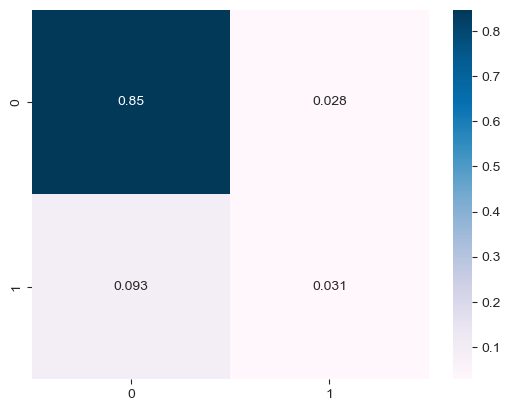

In [94]:
confusion = confusion_matrix(y_test, xgb.predict(X_test), normalize='all')
sns.heatmap(confusion, annot=True, cmap = "PuBu")

Acutal ALIVE -- Predicted ALIVE --> 85%

Acutal ALIVE -- Predicted DEAD --> 2.8%

Acutal DEAD -- Predicted ALIVE --> 9.3%

Acutal DEAD -- Predicted DEAD --> 3.1%

**As mentioned earlier, this is an highly imbalanced dataset out of all patients only 14% patients were died but remianing 86% of patients were alive , due to this imbalance in nature less bias towards major class (i.e. 0 alive) and high variance on test data due to this reason model has predicted all patients as alive, moreover as observed from classification report the accuracy is 85% but f1 score for Minority class is 36%, to deal this problem we have to balance the data between majority class (i.e. 0) and Minority calss (i.e. 1), there were different techniques available but for this study I will be using SMOTE ('Synthetic Minority Oversampling Technique')**

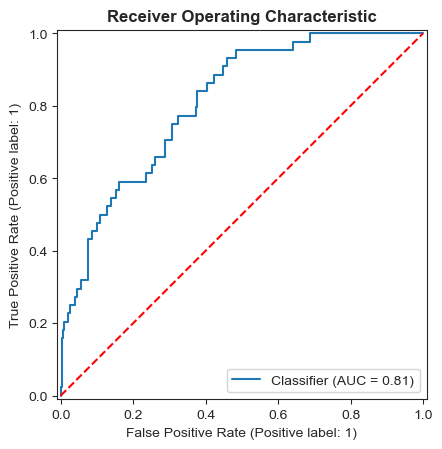

In [97]:
# AUC ROC Curve plotting
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

# Get predictions
probs = xgb.predict_proba(X_test)
preds = probs[:, 1]  # Get probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Plot using RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, preds)

import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line
plt.title('Receiver Operating Characteristic', weight='bold')
plt.show()

In [99]:
# Sensitivity and Specificity

In [101]:
xgb.feature_importances_

array([0.01289968, 0.02218447, 0.00814501, 0.02901417, 0.03364067,
       0.00217163, 0.03189155, 0.        , 0.01733848, 0.03343795,
       0.        , 0.02084668, 0.01130653, 0.00946298, 0.0234363 ,
       0.01601057, 0.02246485, 0.02691232, 0.01272435, 0.03110549,
       0.01853562, 0.01201847, 0.01091117, 0.02936492, 0.03399051,
       0.02222677, 0.02333852, 0.01108912, 0.02460078, 0.01606324,
       0.01893278, 0.015461  , 0.01481898, 0.01909379, 0.02423934,
       0.01610818, 0.0212447 , 0.0191583 , 0.04749966, 0.01690919,
       0.0591017 , 0.01857828, 0.01774753, 0.05739211, 0.02912097,
       0.01213805, 0.0253226 ], dtype=float32)

Text(0.5, 0, 'Xgboost Feature Importance')

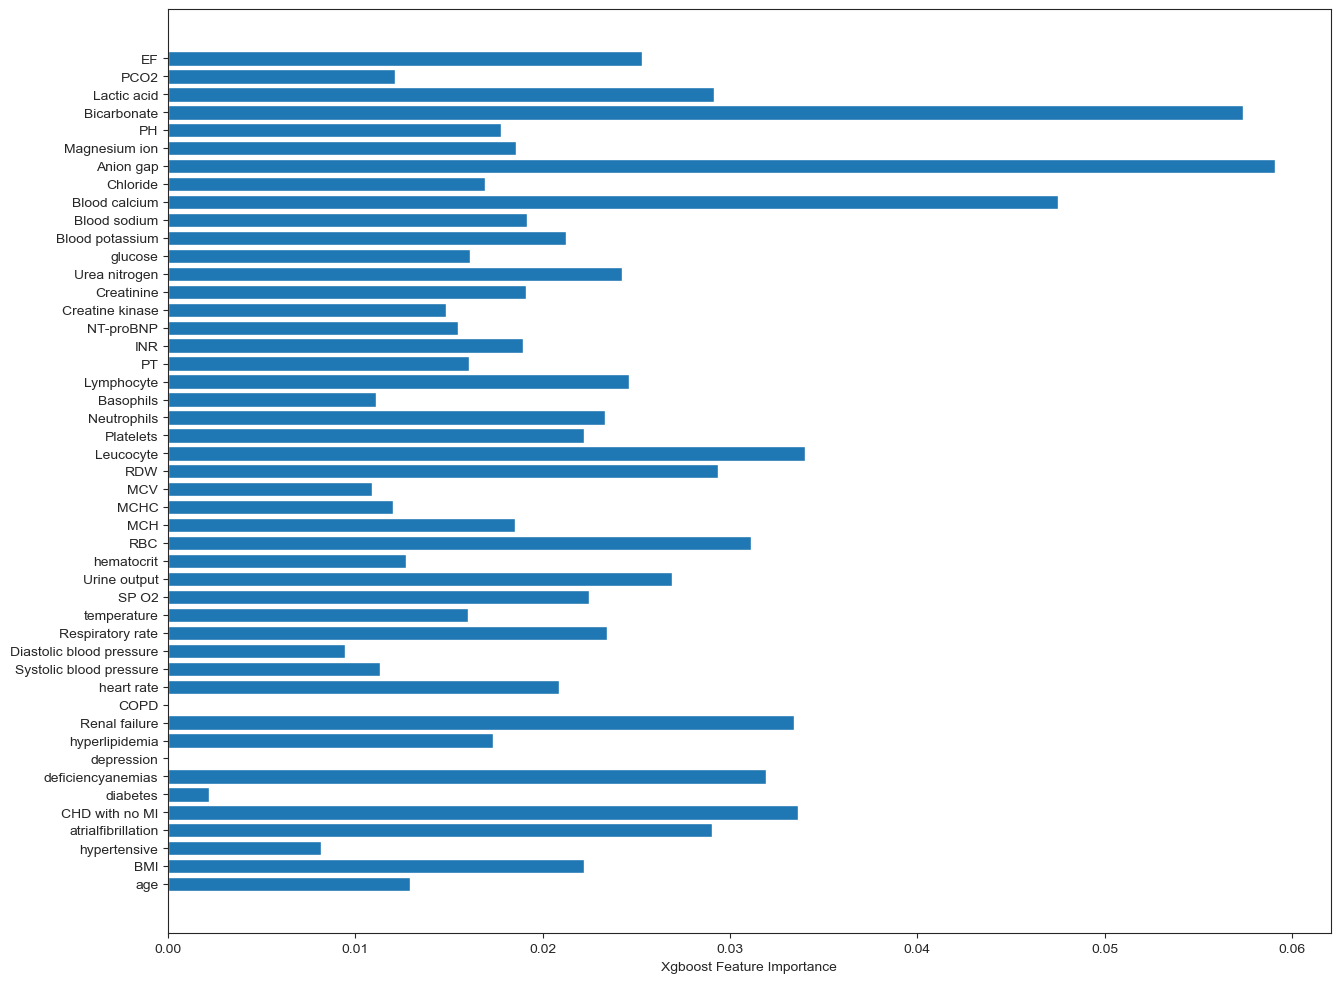

In [103]:
# xgb.feature_importances_
plt.figure(figsize=(15, 12))
plt.barh(X.columns, xgb.feature_importances_)
plt.xlabel("Xgboost Feature Importance")

# Oversampling using SMOTE

In [106]:
!pip install imbalanced-learn

In [108]:
from imblearn.over_sampling import SMOTE

# Create SMOTE instance without 'n_jobs'
smote = SMOTE(sampling_strategy='minority')

In [110]:
X_resampled, y_resampled = smote.fit_resample(X, y)

In [112]:
X_resampled.shape, y_resampled.shape

((2036, 47), (2036, 1))

In [114]:
y_resampled.value_counts()

outcome
0          1018
1          1018
Name: count, dtype: int64

# Custom Oversampled Dataset Predictions

In [117]:
train_X, test_X, train_y, test_y = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state = 10)

In [119]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((1425, 47), (611, 47), (1425, 1), (611, 1))

In [121]:
train_y.value_counts()

outcome
1          719
0          706
Name: count, dtype: int64

In [123]:
from xgboost import XGBClassifier

classifier = XGBClassifier(verbosity=0, random_state=42, n_jobs=-1)
classifier.fit(train_X, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

In [125]:
keys = ['outcome', 'BMI', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'Creatine kinase','glucose', 'Blood calcium',
       'PH', 'Lactic acid', 'PCO2']
missing = {x:missing_values[x] for x in keys}

In [127]:
print(classification_report(test_y, classifier.predict(test_X), digits = 5))

              precision    recall  f1-score   support

           0    0.93688   0.90385   0.92007       312
           1    0.90323   0.93645   0.91954       299

    accuracy                        0.91980       611
   macro avg    0.92005   0.92015   0.91980       611
weighted avg    0.92041   0.91980   0.91981       611



                precision    recall  f1-score   support
    
               0    0.93355   0.90064   0.91680       312
               1    0.90000   0.93311   0.91626       299

        accuracy                        0.91653       611
       macro avg    0.91678   0.91688   0.91653       611
    weighted avg    0.91713   0.91653   0.91654       611

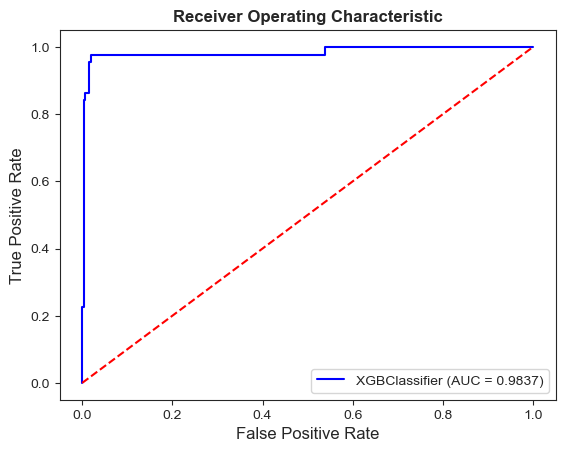

In [130]:
# AUC ROC Curve plotting
probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# plt.figure(figsize = (12, 7))
plt.title('Receiver Operating Characteristic', weight='bold')
plt.plot(fpr, tpr, 'b', label = 'XGBClassifier (AUC = %0.4f)' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.show()

Text(0.5, 0, 'Feature Importance')

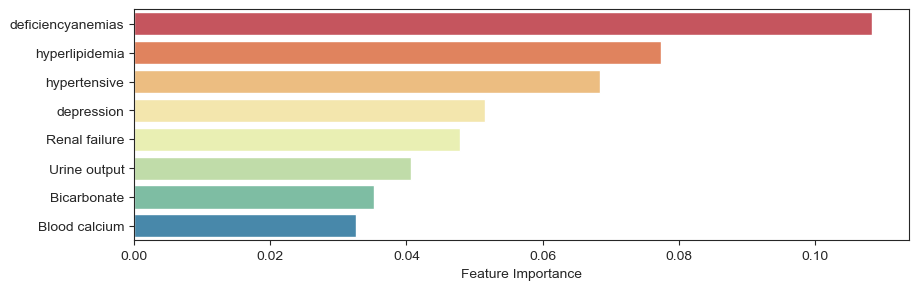

In [132]:
sns.set_style("ticks")
plt.figure(figsize=(10, 3))
sorted_idx = classifier.feature_importances_.argsort()[:38:-1]
sns.barplot(x = classifier.feature_importances_[sorted_idx], y = X.columns[sorted_idx], palette = "Spectral")
plt.xlabel("Feature Importance")

In [134]:
confusion_clf = confusion_matrix(test_y, classifier.predict(test_X))
print(confusion_clf)

[[282  30]
 [ 19 280]]


In [136]:
LGB_clf = LGBMClassifier(random_state = 42, n_jobs = -1)
LGB_clf.fit(train_X, train_y)

print(classification_report(test_y, LGB_clf.predict(test_X), digits = 5,output_dict=False))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 719, number of negative: 706
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9311
[LightGBM] [Info] Number of data points in the train set: 1425, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504561 -> initscore=0.018246
[LightGBM] [Info] Start training from score 0.018246
              precision    recall  f1-score   support

           0    0.93645   0.89744   0.91653       312
           1    0.89744   0.93645   0.91653       299

    accuracy                        0.91653       611
   macro avg    0.91695   0.91695   0.91653       611
weighted avg    0.91736   0.91653   0.91653       611



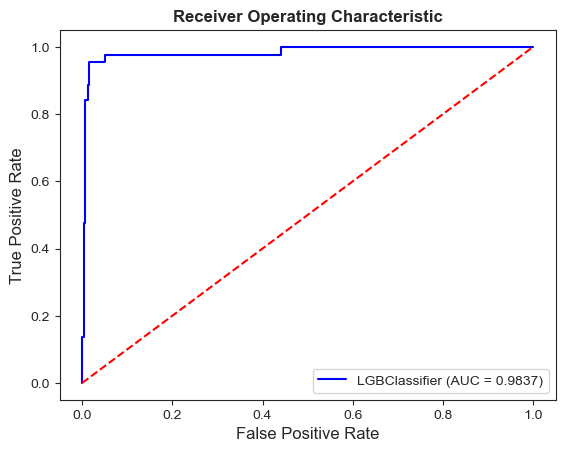

In [138]:
# AUC ROC Curve plotting
probs = LGB_clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# plt.figure(figsize = (12, 7))
plt.title('Receiver Operating Characteristic', weight='bold')
plt.plot(fpr, tpr, 'b', label = 'LGBClassifier (AUC = %0.4f)' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.show()

Text(0.5, 0, 'Feature Importance')

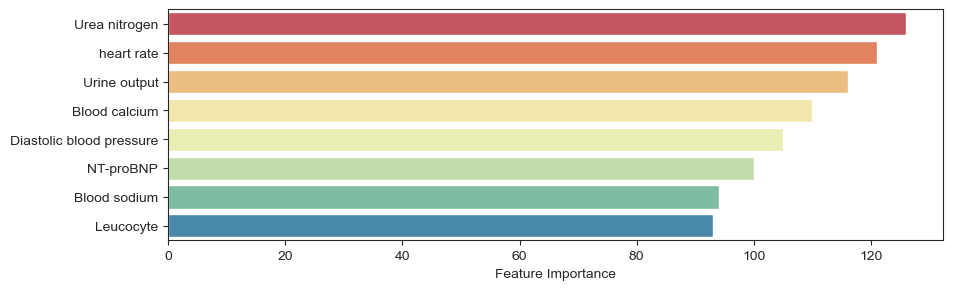

In [140]:
plt.figure(figsize=(10, 3))
sorted_idx = LGB_clf.feature_importances_.argsort()[:38:-1]
sns.barplot(x = LGB_clf.feature_importances_[sorted_idx], y = X.columns[sorted_idx], palette = "Spectral")
plt.xlabel("Feature Importance")

In [142]:
CTB_clf = CatBoostClassifier(verbose=0, random_state = 42)
CTB_clf.fit(train_X, train_y)

print(classification_report(test_y, CTB_clf.predict(test_X), digits = 5))

              precision    recall  f1-score   support

           0    0.93624   0.89423   0.91475       312
           1    0.89457   0.93645   0.91503       299

    accuracy                        0.91489       611
   macro avg    0.91541   0.91534   0.91489       611
weighted avg    0.91585   0.91489   0.91489       611



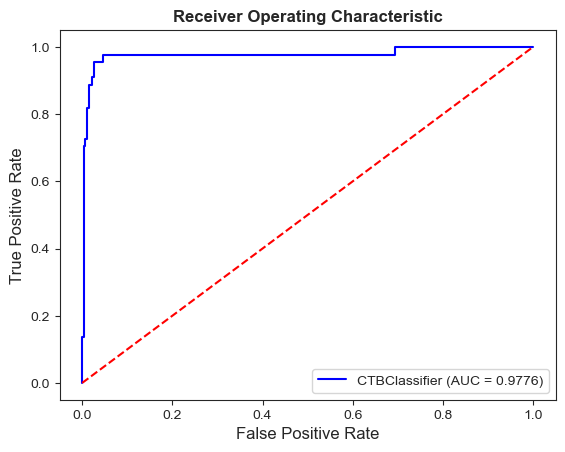

In [144]:
# AUC ROC Curve plotting
probs = CTB_clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# plt.figure(figsize = (12, 7))
plt.title('Receiver Operating Characteristic', weight='bold')
plt.plot(fpr, tpr, 'b', label = 'CTBClassifier (AUC = %0.4f)' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.show()

Text(0.5, 0, 'Feature Importance')

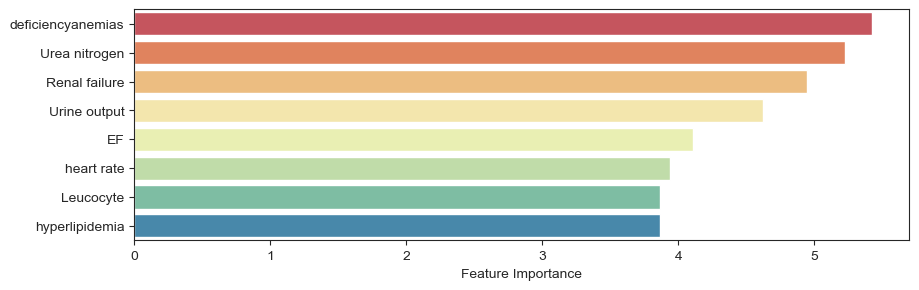

In [146]:
plt.figure(figsize=(10, 3))
sorted_idx = CTB_clf.feature_importances_.argsort()[:38:-1]
sns.barplot(x = CTB_clf.feature_importances_[sorted_idx], y = X.columns[sorted_idx], palette = "Spectral")
plt.xlabel("Feature Importance")

In [148]:
RDG_clf = RidgeClassifier(random_state = 12)
RDG_clf.fit(train_X, train_y)

print(classification_report(test_y, RDG_clf.predict(test_X), digits = 5))

              precision    recall  f1-score   support

           0    0.86054   0.81090   0.83498       312
           1    0.81388   0.86288   0.83766       299

    accuracy                        0.83633       611
   macro avg    0.83721   0.83689   0.83632       611
weighted avg    0.83771   0.83633   0.83629       611



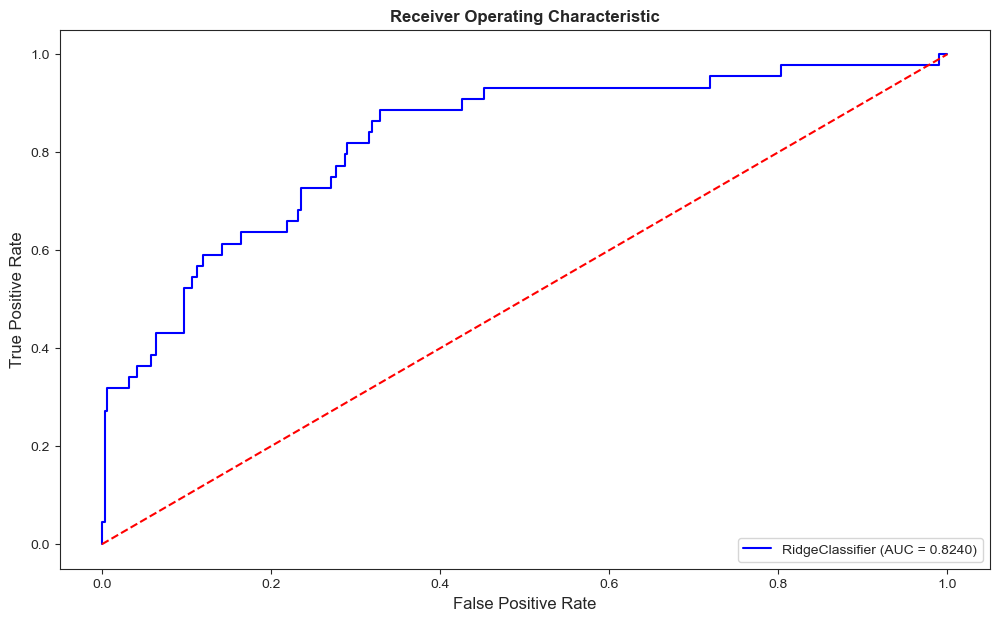

In [150]:
from sklearn.linear_model import RidgeClassifier
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from scipy.special import expit  # Sigmoid function

# Get the decision function (raw margin values)
margin = RDG_clf.decision_function(X_test)

# Apply the sigmoid function to get probabilities
probs = expit(margin)  # Convert raw margins to probabilities
preds = probs  # Since it's binary classification, probs will be the probabilities for the positive class

# Calculate ROC curve
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(12, 7))
plt.title('Receiver Operating Characteristic', weight='bold')
plt.plot(fpr, tpr, 'b', label='RidgeClassifier (AUC = %0.4f)' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.ylabel('True Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.show()

In [152]:
SGD_clf = SGDClassifier(loss = "hinge",n_jobs=-1)
SGD_clf.fit(train_X, train_y)

print(classification_report(test_y, SGD_clf.predict(test_X), digits = 5))

              precision    recall  f1-score   support

           0    0.50984   0.99679   0.67462       312
           1    0.00000   0.00000   0.00000       299

    accuracy                        0.50900       611
   macro avg    0.25492   0.49840   0.33731       611
weighted avg    0.26034   0.50900   0.34449       611



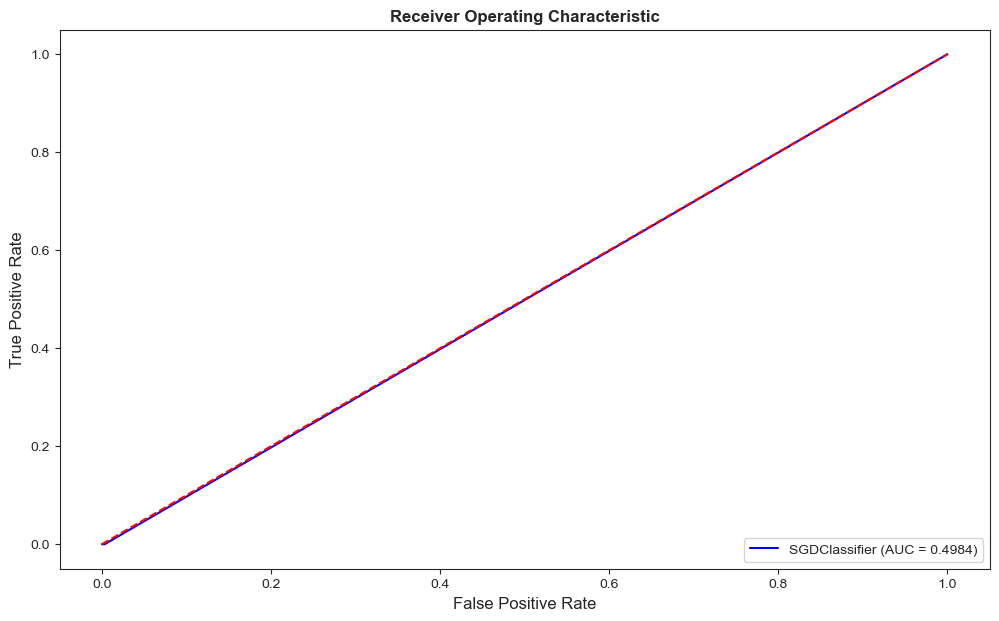

In [154]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming SGD_clf is your SGDClassifier
SGD_clf = SGDClassifier(loss='log_loss')  # Use log_loss for probability estimates

# Train your classifier (you may have already done this part)
SGD_clf.fit(X_train, y_train)

# AUC ROC Curve plotting
probs = SGD_clf.predict_proba(X_test)
preds = probs[:, 1]  # Probability of positive class
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 7))
plt.title('Receiver Operating Characteristic', weight='bold')
plt.plot(fpr, tpr, 'b', label='SGDClassifier (AUC = %0.4f)' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.ylabel('True Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.show()

In [156]:
GNB_clf = GaussianNB()
GNB_clf.fit(train_X, train_y)

print(classification_report(test_y, GNB_clf.predict(test_X), digits = 5))

              precision    recall  f1-score   support

           0    0.74728   0.88141   0.80882       312
           1    0.84774   0.68896   0.76015       299

    accuracy                        0.78723       611
   macro avg    0.79751   0.78519   0.78449       611
weighted avg    0.79644   0.78723   0.78500       611



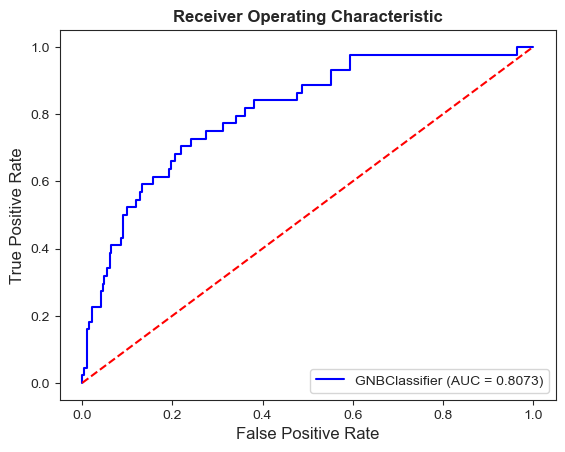

In [158]:
# AUC ROC Curve plotting
probs = GNB_clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# plt.figure(figsize = (12, 7))
plt.title('Receiver Operating Characteristic', weight='bold')
plt.plot(fpr, tpr, 'b', label = 'GNBClassifier (AUC = %0.4f)' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.show()

In [160]:
RFC_clf = RandomForestClassifier(n_jobs=-1)
RFC_clf.fit(train_X, train_y)

print(classification_report(test_y, RFC_clf.predict(test_X), digits = 5))

              precision    recall  f1-score   support

           0    0.94684   0.91346   0.92985       312
           1    0.91290   0.94649   0.92939       299

    accuracy                        0.92962       611
   macro avg    0.92987   0.92997   0.92962       611
weighted avg    0.93023   0.92962   0.92963       611



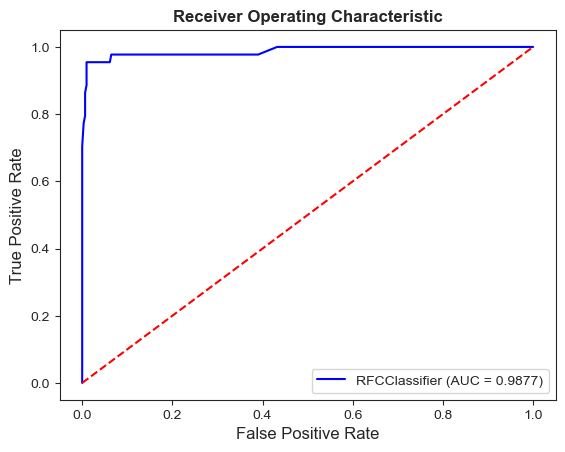

In [162]:
# AUC ROC Curve plotting
probs = RFC_clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# plt.figure(figsize = (12, 7))
plt.title('Receiver Operating Characteristic', weight='bold')
plt.plot(fpr, tpr, 'b', label = 'RFCClassifier (AUC = %0.4f)' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.show()

In [164]:
RFC_clf.feature_importances_

array([0.01281684, 0.01643856, 0.01730471, 0.00302934, 0.0041327 ,
       0.01545418, 0.04305057, 0.00715048, 0.02841891, 0.03924124,
       0.00344382, 0.0383892 , 0.01526288, 0.01851516, 0.01789619,
       0.01685359, 0.0188098 , 0.04732744, 0.01409231, 0.01176362,
       0.01079175, 0.01537811, 0.01259569, 0.02209088, 0.04616039,
       0.01812084, 0.01622731, 0.01167385, 0.02558767, 0.02442767,
       0.03107803, 0.02073368, 0.01446317, 0.02079798, 0.04633648,
       0.01323339, 0.01965934, 0.01941493, 0.03408751, 0.0143342 ,
       0.02757282, 0.01872012, 0.02780898, 0.04997903, 0.02128283,
       0.0129745 , 0.01507732])

Text(0.5, 0, 'Feature Importance')

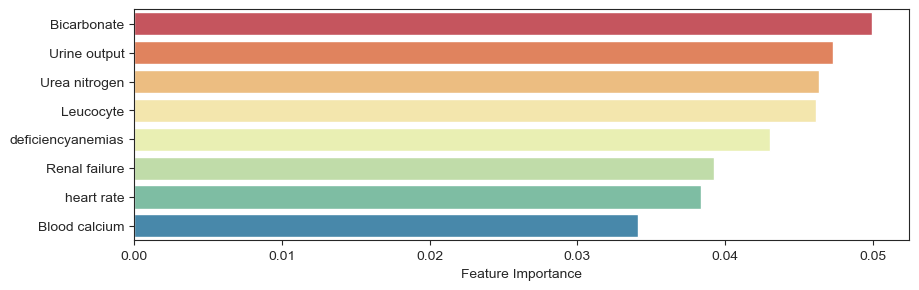

In [166]:
plt.figure(figsize=(10, 3))
sorted_idx = RFC_clf.feature_importances_.argsort()[:38:-1]
sns.barplot(x = RFC_clf.feature_importances_[sorted_idx], y = X.columns[sorted_idx], palette = "Spectral")
plt.xlabel("Feature Importance")

In [168]:
ABC_clf = AdaBoostClassifier(n_estimators=50)
ABC_clf.fit(train_X, train_y)

print(classification_report(test_y, ABC_clf.predict(test_X), digits = 5))

              precision    recall  f1-score   support

           0    0.89209   0.79487   0.84068       312
           1    0.80781   0.89967   0.85127       299

    accuracy                        0.84615       611
   macro avg    0.84995   0.84727   0.84597       611
weighted avg    0.85084   0.84615   0.84586       611



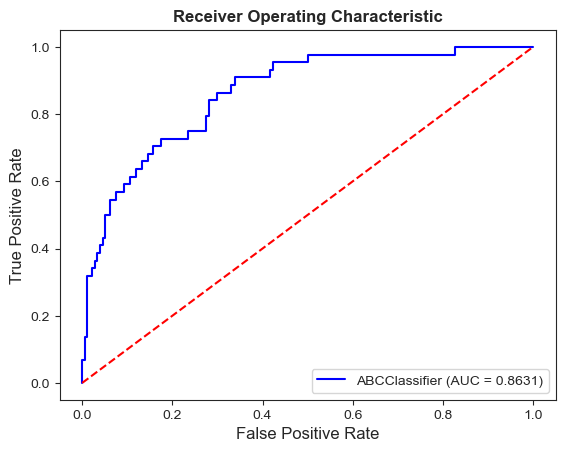

In [170]:
# AUC ROC Curve plotting
probs = ABC_clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# plt.figure(figsize = (12, 7))
plt.title('Receiver Operating Characteristic', weight='bold')
plt.plot(fpr, tpr, 'b', label = 'ABCClassifier (AUC = %0.4f)' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.show()

In [172]:
GBC_clf = GradientBoostingClassifier(random_state=13)
GBC_clf.fit(train_X, train_y)

print(classification_report(test_y, GBC_clf.predict(test_X), digits = 5))

              precision    recall  f1-score   support

           0    0.92256   0.87821   0.89984       312
           1    0.87898   0.92308   0.90049       299

    accuracy                        0.90016       611
   macro avg    0.90077   0.90064   0.90016       611
weighted avg    0.90123   0.90016   0.90016       611



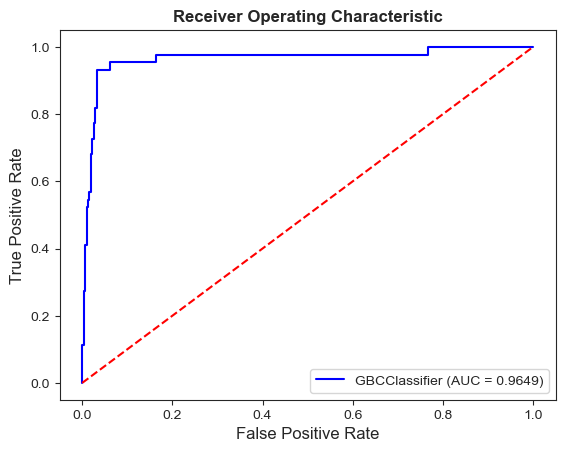

In [173]:
# AUC ROC Curve plotting
probs = GBC_clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# plt.figure(figsize = (12, 7))
plt.title('Receiver Operating Characteristic', weight='bold')
plt.plot(fpr, tpr, 'b', label = 'GBCClassifier (AUC = %0.4f)' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.show()

In [176]:
LRC_clf = LogisticRegression()
LRC_clf.fit(train_X, train_y)

print(classification_report(test_y, LRC_clf.predict(test_X), digits = 5))

              precision    recall  f1-score   support

           0    0.78799   0.71474   0.74958       312
           1    0.72866   0.79933   0.76236       299

    accuracy                        0.75614       611
   macro avg    0.75832   0.75704   0.75597       611
weighted avg    0.75895   0.75614   0.75583       611



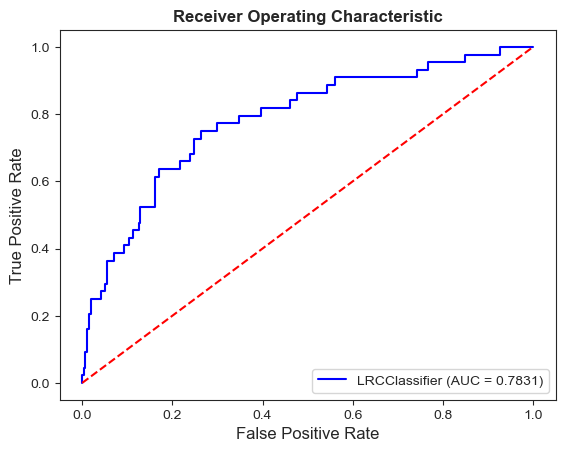

In [178]:
# AUC ROC Curve plotting
probs = LRC_clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# plt.figure(figsize = (12, 7))
plt.title('Receiver Operating Characteristic', weight='bold')
plt.plot(fpr, tpr, 'b', label = 'LRCClassifier (AUC = %0.4f)' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.show()

# Integrated Results

In [180]:
params = {}


LGB_clf = LGBMClassifier(**params)
XGB_clf = XGBClassifier(verbosity=0, **params)
CTB_clf = CatBoostClassifier(verbose=0, **params)
RDG_clf = RidgeClassifier(**params)
SGD_clf = SGDClassifier(loss="hinge", **params)
GNB_clf = GaussianNB(**params)
RFC_clf = RandomForestClassifier(**params)
ABC_clf = AdaBoostClassifier(**params)
GBC_clf = GradientBoostingClassifier(random_state=0, **params)
LRC_clf = LogisticRegression(**params)

In [182]:
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit
from sklearn.metrics import make_scorer

# Define the algorithms (make sure they are sklearn compatible models or wrapped appropriately)
algorithms = [
    LGBMClassifier(),  # Ensure you use the correct scikit-learn wrapper
    XGBClassifier(),
    CatBoostClassifier(silent=True),  # CatBoost has a special parameter 'silent'
    RidgeClassifier(),
    SGDClassifier(),
    GaussianNB(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(),
]

# Define the metric (e.g., 'accuracy' or 'roc_auc')
metric = 'accuracy'  # Or 'roc_auc' or your custom scoring function

# Setup cross-validation
CV = StratifiedShuffleSplit(n_splits=5, random_state=42)

# Loop over classifiers and perform cross-validation
for alg in algorithms:
    # Cross-validation score
    scores = cross_val_score(alg, X_resampled, y_resampled, scoring=metric, cv=CV)
    print("%s %0.2f (+/- %0.2f) %s" % (metric, scores.mean(), scores.std(), alg.__class__.__name__))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 916, number of negative: 916
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001311 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9317
[LightGBM] [Info] Number of data points in the train set: 1832, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 916, number of negative: 916
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000694 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9318
[LightGBM] [Info] Number of data points in the train set: 1832, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.5

    f1_macro 0.93 (+/- 0.02) LGBMClassifier
    f1_macro 0.93 (+/- 0.01) XGBClassifier
    f1_macro 0.94 (+/- 0.01) CatBoostClassifier
    f1_macro 0.84 (+/- 0.02) RidgeClassifier
    f1_macro 0.53 (+/- 0.10) SGDClassifier
    f1_macro 0.80 (+/- 0.03) GaussianNB
    f1_macro 0.94 (+/- 0.02) RandomForestClassifier
    f1_macro 0.86 (+/- 0.00) AdaBoostClassifier
    f1_macro 0.90 (+/- 0.02) GradientBoostingClassifier
    f1_macro 0.72 (+/- 0.02) LogisticRegression

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 719, number of negative: 706
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001648 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9311
[LightGBM] [Info] Number of data points in the train set: 1425, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504561 -> initscore=0.018246
[LightGBM] [Info] Start training from score 0.018246
     LGB  XGB  Cat  Ran  final_aggregated_prediction
581    1    1    1    1                            1
582    1    1    1    1                            1
583    1    1    1    1                            1
584    1    1    1    1                            1
585    1    1    1    1                            1
586    1    1    1    1                            1
587    1    1    1    1                            1
588    0 

<Axes: >

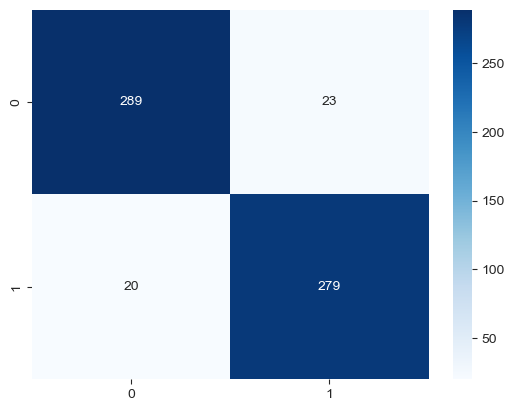

In [184]:
def predict(X__train, y__train, X__pred, all_algorithms):
    stacked_predicts = pd.DataFrame()
    stacked_column_names = []
    for alg in all_algorithms:
        alg_name = str(alg.__class__.__name__)[:3]
        model = alg.fit(X__train, y__train)
        y_hat = model.predict(X__pred)
        stacked_predicts[alg_name] = y_hat
        stacked_column_names.append(alg_name)
    stacked_predicts['final_aggregated_prediction'] = stacked_predicts[stacked_column_names].mode(axis=1)[0].astype('int64')
    y_hat = list(stacked_predicts.loc[:, 'final_aggregated_prediction'])
    print(stacked_predicts[-30:])
    del stacked_predicts
    return y_hat


algorithms = [
              LGB_clf, 
              XGB_clf, 
              CTB_clf, 
#               RDG_clf, 
#               SGD_clf, 
#               GNB_clf, 
              RFC_clf, 
#               ABC_clf, 
#               GBC_clf, 
#               LRC_clf, 
             ]


pred = predict(train_X, train_y, test_X, algorithms)

score = METRIC(test_y, pred, average='macro')
print(f'\n{metric}: {score}\n')
# print(f'last 30 y_test: {list(test_y[target][-30:])}')
# print(f'last 30 y_pred: {pred[-30:]}\n')
print(f'Classification Report:\n')
print(classification_report(test_y, pred), '\n')


cm = confusion_matrix(test_y, pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')

    f1_macro: 0.9328968903436989

    Classification Report:

                    precision    recall  f1-score   support
   
                0       0.95      0.91      0.93       312
                1       0.91      0.95      0.93       299

        accuracy                           0.93       611
       macro avg       0.93      0.93      0.93       611
    weighted avg       0.93      0.93      0.93       611

# By Hyperparameter Tuning

In [188]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

def evaluate(clf, X, y):
    CV = StratifiedShuffleSplit(n_splits=5, random_state=42)
    scores = cross_val_score(clf, X, y, scoring=metric, cv=CV)
    score = scores.mean()
    return score

In [190]:
def objective(trial):
    params = {
        'metric': trial.suggest_categorical('metric', ['binary_error',"binary_logloss"]),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 105, step=25),
        'learning_rate' :  trial.suggest_loguniform('learning_rate', 1e-5, 1.0),
        'max_depth' : trial.suggest_int('max_depth', 4, 12, step=2),
        'reg_lambda' : trial.suggest_loguniform('reg_lambda', 1e-5, 10.0),
        'reg_alpha' : trial.suggest_loguniform('reg_alpha', 1e-5, 10.0),
    }
    
    LGB_clf = LGBMClassifier(**params)
    return evaluate(LGB_clf, X_resampled, y_resampled)
    
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=3)
params = study.best_params
print(f'{metric}: {study.best_value}')
print(params)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 916, number of negative: 916
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000674 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9317
[LightGBM] [Info] Number of data points in the train set: 1832, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

f1_macro: 0.9283448760096817

In [192]:
params = {'metric': 'binary_logloss', 'num_leaves': 112, 
          'min_child_samples': 80, 'learning_rate': 0.2866074254648006, 
          'max_depth': 12, 'reg_lambda': 0.0001261576527556916, 
          'reg_alpha': 4.542475824392113e-05}
LGB_clf = LGBMClassifier(**params)

In [194]:
def objective(trial):
    params = {
        'lambda': trial.suggest_loguniform('lambda', 1e-5, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-5, 10.0),
        'learning_rate' :  trial.suggest_loguniform('learning_rate', 1e-5, 1.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]),
        'colsample_bylevel': trial.suggest_categorical('colsample_bylevel', [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]),
        'colsample_bynode': trial.suggest_categorical('colsample_bynode', [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]),
        'subsample': trial.suggest_categorical('subsample', [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]),
        'max_depth':  trial.suggest_int('max_depth', 4, 12, step=2),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
    }
    XGB_clf = XGBClassifier(verbosity=0, **params)
    return evaluate(XGB_clf, X_resampled, y_resampled)
    
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=3)
params = study.best_params
print(f'{metric}: {study.best_value}')
print(params)

accuracy: 0.8539215686274509
{'lambda': 0.15417077652332728, 'alpha': 2.2929664441640255e-05, 'learning_rate': 0.001315539293964703, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.3, 'colsample_bynode': 0.7, 'subsample': 0.3, 'max_depth': 6, 'min_child_weight': 7}


f1_macro: 0.9333000257084603

In [197]:
params = {'lambda': 0.00017351981502448073, 'alpha': 1.1493784396911765e-05, 
        'learning_rate': 0.027346390661614303, 'colsample_bytree': 0.2, 
        'colsample_bylevel': 0.6, 'colsample_bynode': 1, 'subsample': 0.7, 
        'max_depth': 8, 'min_child_weight': 2}
XGB_clf = XGBClassifier(verbosity=0, **params)

In [199]:
algorithms = [
              LGB_clf, 
              XGB_clf, 
              CTB_clf, 
              RFC_clf, 
             ]

CV = StratifiedShuffleSplit(n_splits=5, random_state=42)

for alg in algorithms:
    scores = cross_val_score(alg, X_resampled, y_resampled, scoring=metric, cv=CV)
    print("%s %0.2f (+/- %0.2f) %s" % (metric, scores.mean(), scores.std(), alg.__class__.__name__))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 916, number of negative: 916
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9317
[LightGBM] [Info] Number of data points in the train set: 1832, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 719, number of negative: 706
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9307
[LightGBM] [Info] Number of data points in the train set: 1425, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504561 -> initscore=0.018246
[LightGBM] [Info] Start training from score 0.018246
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

<Axes: >

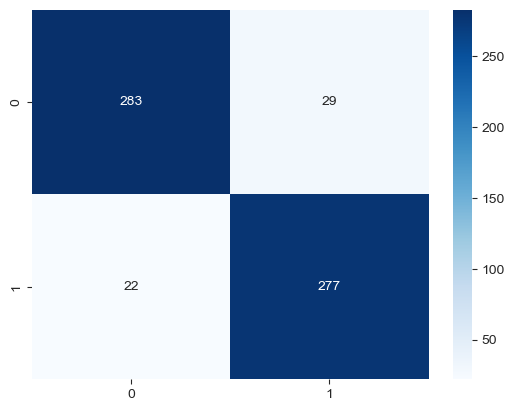

In [201]:
algorithms = [
              LGB_clf, 
              XGB_clf, 
              CTB_clf, 
              RFC_clf, 
             ]


pred = predict(train_X, train_y, test_X, algorithms)

score = METRIC(test_y, pred, average='macro')
print(f'\n{metric}: {score}\n')
print(f'Classification Report:\n')
print(classification_report(test_y, pred), '\n')


cm = confusion_matrix(test_y, pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')